# **TF-IDF Meets Jeopardy!**

Yihan (Jeffery) Huang

Data Assignment #2

April 2nd, 2024

# Introduction:

The Term Frequency-Inverse Document Frequency (TF-IDF) statistical measure has been widely acknowledged for its utility in evaluating the importance of a word within a document relative to a corpus, marking a cornerstone in the domain of Natural Language Processing (NLP). Its application spans a myriad of contexts, notably in classifying and forecasting word trends across diverse fields, from social media analytics to sentiment analysis. Highlighted in recent studies, such as the research named "The effect of the TF-IDF algorithm in times series in forecasting word on social media" published in the Indonesian Journal of Electrical Engineering and Computer Science (May 2021), TF-IDF's efficacy in predicting word usage trends on platforms like Twitter underscores its adaptability and precision in handling dynamic and vast datasets. These studies illuminate the potential of TF-IDF not only in discerning prevalent word usage but also in forecasting, thereby opening avenues for its application in novel domains.

However, a discernible gap in the literature is the exploration of TF-IDF's potential in differentiating between a category and its subcategories within specialized datasets. This nuanced application is particularly pertinent to datasets characterized by a wide array of topics and linguistic styles, a challenge not fully addressed in existing studies. Recognizing this research opportunity motivates the current study's focus on the Jeopardy quiz show dataset. Jeopardy, renowned for its extensive variety of clues that span numerous topics, formats, and language nuances, presents an ideal candidate for exploring NLP techniques, especially TF-IDF. This research aims to leverage TF-IDF to analyze Jeopardy clues, with the goal of categorizing them and understanding their significance. Such an approach not only aids in developing a predictive model for identifying corresponding categories and their subcategories, like 'History' versus 'US History', but also contributes to filling the noted research gap.

Predicting Jeopardy categories and subcategories serves multiple key interests. It aids in advancing our comprehension of the complexities of natural language and trivia questions, facilitating the development of intelligent quiz systems and educational resources that are both adaptive and personalized. By integrating TF-IDF within the Jeopardy context, this study seeks to provide novel insights into text classification and predictive modeling in NLP, paving the way for further research and innovation in the field. Beyond advancing academic discourse, this endeavor has practical implications, notably in the realm of automated trivia question generation. By accurately analyzing and predicting categories and subcategories of Jeopardy clues, the research aims to facilitate the development of models capable of self-generating nuanced trivia questions. Such models promise to revolutionize the creation of trivia content, enabling personalized, engaging, and varied question sets that cater to a wide range of interests and difficulty levels.



# Research Question:

Are there significant differences in important words between History and American History Jeopardy clues?

# Expected Outcome:

There are sigificant differences in important words between History and  American History Jeopardy clues.

# Data Explanation:

This dataset is a well-organized collection of Jeopardy! clues, spanning from Season 1 to Season 39, which ended in July 2023, and comprises a total of 473,067 clues. It captures the evolution and variety of questions featured on the show, reflecting its rich history and the vast spectrum of knowledge tested. The data is structured into several columns detailing the specifics of each clue, including its round, value, whether it's a Daily Double, and the category it belongs to.

Key columns such as 'round' distinguish between the game's segments, while 'clue_value' and 'daily_double_value' indicate the financial stakes associated with each clue. The 'category' and 'comments' columns provide context on the topics covered and any host remarks, respectively. Crucially, the 'answer' and 'question' columns capture the core exchange between prompt and response in the game. Additional details like the episode's air date and miscellaneous notes about the clues are also included, enriching the dataset and offering a comprehensive view of Jeopardy!'s extensive history.

This research will mainly focus on the 'category' and 'answer' columns, specifically on the 'History' and 'American History' categories. By compiling all the words included in these two categories into a large corpus, we can perform TF-IDF vectorization and combine it with a machine learning model to see how accurately it can predict the Jeopardy categories.

https://github.com/jwolle1/jeopardy_clue_dataset

# Data Import

In [ ]:
# Load the Drive helper
from google.colab import drive

# Below will prompt for authorization but it will make your google drive available (i.e., mount your drive).
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries and Read in Data


In [ ]:
import os
import spacy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
os.getcwd() #what is the current working directory

os.chdir("/content/drive/MyDrive") #change directory

os.listdir()

In [ ]:
jeopardy_df = pd.read_csv('combined_season1-39.tsv', delimiter='\t')

In [ ]:
jeopardy_df

,round,clue_value,daily_double_value,category,comments,answer,question,air_date,notes
0,1,100,0,LAKES & RIVERS,NaN,River mentioned most often in the Bible,the Jordan,1984-09-10,NaN
1,1,200,0,LAKES & RIVERS,NaN,Scottish word for lake,loch,1984-09-10,NaN
2,1,400,0,LAKES & RIVERS,NaN,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,NaN
3,1,500,0,LAKES & RIVERS,NaN,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,NaN
4,1,100,0,INVENTIONS,NaN,Marconi's wonderful wireless,a radio,1984-09-10,NaN
...,...,...,...,...,...,...,...,...,...
468312,2,400,0,"\""CC"" ME",NaN,"The American Cancer Society says, ""Stay away f...",tobacco,2023-07-28,NaN
468313,2,800,0,"\""CC"" ME",NaN,"In the 5 stages of grief, it comes last",acceptance,2023-07-28,NaN
468314,2,1200,0,"\""CC"" ME",NaN,It begins as a hot dry desert wind over northe...,a sirocco,2023-07-28,NaN
468315,2,2000,0,"\""CC"" ME",NaN,In medicine it's the complete or partial obstr...,occlusion,2023-07-28,NaN


# Data Cleaning and Wrangling:



The original dataset was clean, here are some steps for data cleaning and wrangling:

1. Convert the 'air_date' column to datetime format to facilitate time-based analysis
2. Count the unique categories in the entire dataset and list the top 5
3. Filter the dataset to retain only clues from the 'HISTORY' and 'AMERICAN HISTORY' categories, focusing the analysis on these topics, then add a new column'category_number' to label 'HISTORY' as 1 and 'AMERICAN HISTORY' as 2, facilitating numerical analysis and model input preparation
4. Remove unnecessary columns for visibility
5. Reindex the new dataset to ensure a clean, sequential index for further operations.
6. Double check the unique values for the categories in the new dataset to make sure there are only two, and also check for any missing value.

In [ ]:
# Convert the 'air_date' column to datetime format
jeopardy_df['air_date'] = pd.to_datetime(jeopardy_df['air_date'])

In [ ]:
# Count the number of unique categories of the original dataframe
unique_categories_count = jeopardy_df['category'].nunique()

unique_categories_count

52554

In [ ]:
# Find the top 5 categories and the corresponding number of rows for each
top_5_categories = jeopardy_df['category'].value_counts().head(5)

top_5_categories

category
SCIENCE             1381
AMERICAN HISTORY    1216
LITERATURE          1180
HISTORY             1167
POTPOURRI           1110
Name: count, dtype: int64

In [ ]:
# Filter the dataset to include only the rows with categories in HISTORY, AMERICAN HISTORY
filtered_data = jeopardy_df[jeopardy_df['category'].isin(['AMERICAN HISTORY', 'HISTORY'])]

# Add a new column 'category_number' and label them separately: HISTORY as 1, AMERICAN HISTORY as 2
category_mapping = {'HISTORY': 1, 'AMERICAN HISTORY': 2}

filtered_data['category_number'] = filtered_data['category'].map(category_mapping)

filtered_data

In [ ]:
# Filter out the 'round', 'clue_value', 'daily_double_value', 'air_date', 'comments', and 'notes' columns from the filtered_data DataFrame
new_jeopardy_data = filtered_data.drop(columns=['round', 'clue_value', 'daily_double_value', 'air_date', 'comments', 'notes'])

In [ ]:
# Reindex the new DataFrame and name it jeopardy_data
jeopardy_data = new_jeopardy_data.reset_index(drop=True)

# Display the first few rows of the reindexed DataFrame to verify
jeopardy_data


,category,answer,question,category_number
0,AMERICAN HISTORY,"He served as congressman from 1 state, senator...",Sam Houston,2
1,HISTORY,Convicts were first British settlers on this i...,Australia,1
2,HISTORY,"In 1918, Communists moved Russian capital from...",Moscow,1
3,HISTORY,"Roman ruler who ""came"", ""saw"", & ""conquered\""",Julius Caesar,1
4,HISTORY,"This, the longest recorded war, actually laste...",the Hundred Years' War,1
...,...,...,...,...
2378,HISTORY,A participant in this Boston Harbor event said...,the Boston Tea Party,1
2379,HISTORY,In the 16th century an African man in Japan na...,Samurai,1
2380,HISTORY,"Oddly, the names of the agents involved in thi...",the XYZ Affair,1
2381,HISTORY,This political organization was founded by Hue...,the Black Panthers,1


In [ ]:
# Count the number of unique categories
unique_categories_count_new = jeopardy_data['category'].nunique()

unique_categories_count_new

2

In [ ]:
# Check for missing values in the original dataset (jeopardy_data)
missing_values = jeopardy_data.isnull().sum()

missing_values

category           0
answer             0
question           0
category_number    0
dtype: int64

In [ ]:
jeopardy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         2383 non-null   object
 1   answer           2383 non-null   object
 2   question         2383 non-null   object
 3   category_number  2383 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 74.6+ KB


# NLP Analysis - TF-IDF Exploration




**Step 1**: use the spaCy model to define a function to tokenize the documents and prepare them for Bag of Words and TF-IDF

In [ ]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Convert answers to a list of strings
texts = jeopardy_data['answer'].astype(str).tolist()

# Process the texts to create a list of docs
docs = list(nlp.pipe(texts))

#'docs' is a list of spaCy Doc objects, each corresponding to an answer.

**Step 2**: initialize the bag of words using the CountVectorizer from Sklearn

In [ ]:
# Tokenize doc
def tokenize_docs(doc):
    return [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and token.text.lower() not in STOP_WORDS]

# Convert each Doc to a list of tokenized strings
tokenized_texts = [" ".join([token.text for token in doc]) for doc in docs]

# Initialize CountVectorizer without a custom tokenizer
count_vectorizer = CountVectorizer(lowercase=False)  # Adjust parameters as needed

# Fit the CountVectorizer to the tokenized data
X = count_vectorizer.fit_transform(tokenized_texts)

# Convert it to an array and output a pandas dataframe
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = count_vectorizer.get_feature_names_out()  # This method returns the vocabulary
print(f'Dataframe Shape: {bow_df.shape}')


Dataframe Shape: (2383, 7117)


In [ ]:
# display the bow dataframe

bow_df

,00,000,09,10,100,1000,1001,100th,1014,105,...,you,young,youngest,your,yr,yrs,zero,zone,zones,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Step 3**: Word Frequency Distribution: according to Zipf's law, a statistical distribution in linguistics that suggests a small number of words are used all the time, while the vast majority are used rarely. I also removed Frequency counts lower than 5 to compare it with the original term frequency distribution for better understanding of the visuals.

*   Original
*   Frequency > 5



Text(0.5, 1.0, 'Term Frequency Distribution')

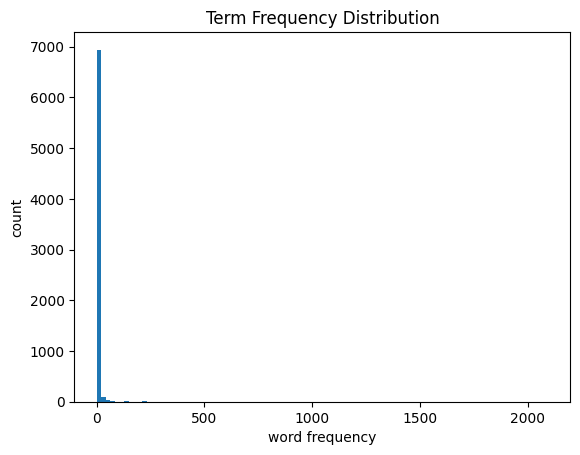

In [ ]:
bow_df.sum().plot.hist(bins=100)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution')

In [ ]:
bow_more_than_1 = bow_df.sum()
bow_more_than_5 = bow_more_than_1[bow_more_than_1 > 5]
bow_more_than_5.sort_values(ascending = False)

the        2094
this       1580
of         1392
in         1213
to          767
           ... 
ruling        6
Daniel        6
running       6
Cuban         6
young         6
Length: 953, dtype: int64

Text(0.5, 1.0, 'Term Frequency Distribution')

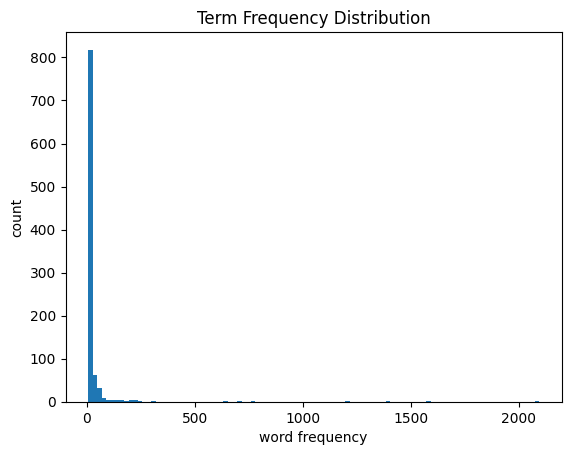

In [ ]:
bow_more_than_5.plot.hist(bins=100)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution')

**Step 4**: TF-IDF Matrix using sklearn, remove the words with the frequency less than 5

In [ ]:
# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=5)

# Fit it to the data
X = tfidf_vectorizer.fit_transform(docs)

# Output a dataframe
tfidf_df = pd.DataFrame(X.toarray())
tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
print(f'Dataframe Shape: {tfidf_df.shape}')
tfidf_df

Dataframe Shape: (2383, 1009)


,$,1,10,100,11,12,13,13th,14,1492,...,work,worker,world,write,wwi,wwii,xiv,year,york,young
0,0.0,0.37206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.320074,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2379,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2380,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2381,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# ML Prediction Model - Logistic Regression

With the TF-IDF matrix prepared, we are ready to employ logistic regression for predicting the categories corresponding to the Jeopardy clues. Initially, the dataset will be partitioned into training and testing subsets. Subsequently, we will utilize a built-in pipeline from scikit-learn to efficiently fit a logistic regression model. This streamlined approach not only facilitates the model training process but also enhances reproducibility and code readability. Upon fitting the model, we will evaluate its performance by examining the accuracy metric and analyzing the confusion matrix. These evaluations will provide insightful feedback on the model's predictive capabilities, highlighting its strengths and identifying areas for improvement.








**Step 1**: use train_text_split from sklearn to split the data into train and test

In [ ]:
# set the random seed
seed = 42

X = jeopardy_data['answer'] # the features we want to analyze
ylabels = jeopardy_data['category_number']

# the labels, or answers, we want to test against
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state = seed)
X_train = list(nlp.pipe(X_train))
X_test = list(nlp.pipe(X_test))

**Step 2**: use a Pipiline class from sklearn to organize the ML process and fit a logistic regression model

In [ ]:
classifier = LogisticRegression()

# When we are doing a multistep process in sklearn, it's best to set it up as a pipeline
pipe = Pipeline([('vectorizer', tfidf_vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False, min_df=5, token_pattern=None,
                                 tokenizer=<function tokenize_docs at 0x7d26a2581510>)),
                ('classifier', LogisticRegression())])

**Step 3**: Check the accuracy and show the confusion matrix



*   Logistic Regression Accuracy (0.786 or 78.6%): the proportion of the total number of predictions that were correct
*   Logistic Regression Precision (0.784 or 78.4%): Precision measures the accuracy of the positive predictions.
*   Logistic Regression Recall (0.785 or 78.5%): Recall, also known as sensitivity or true positive rate, measures the ability of the model to find all the relevant cases within a dataset.







In [ ]:
# Predicting with a test dataset
predicted = pipe.predict(X_test)# Model Accuracy

print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted,average='macro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted,average='macro'))

Logistic Regression Accuracy: 0.7861635220125787
Logistic Regression Precision: 0.7842088484290319
Logistic Regression Recall: 0.7846424010217113


              precision    recall  f1-score   support

           1       0.76      0.77      0.76       216
           2       0.81      0.80      0.80       261

    accuracy                           0.79       477
   macro avg       0.78      0.78      0.78       477
weighted avg       0.79      0.79      0.79       477



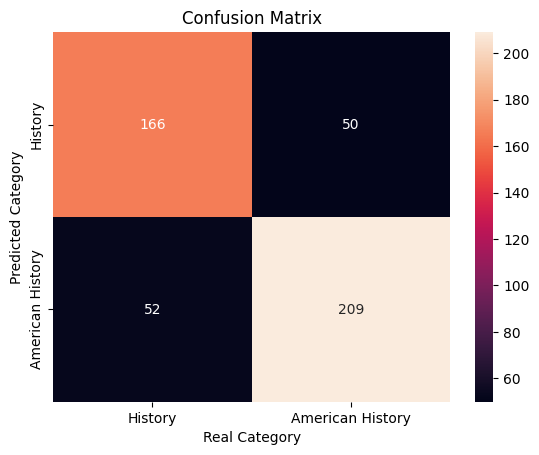

In [ ]:
# Check out a classification report
print(metrics.classification_report(y_test, predicted))

# We can also look at incorrect predictions in a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['History', 'American History'], yticklabels=['History', 'American History'])
plt.title('Confusion Matrix')
plt.xlabel('Real Category')
plt.ylabel('Predicted Category')
plt.show()

* For 'History' (category 1), there are 166 instances where the model correctly predicted the category as 'History' (True Negatives). However, the model incorrectly predicted 52 instances of 'American History' as 'History' (False Negatives).

* For 'American History' (category 2), the model correctly identified 209 instances (True Positives). Yet, it mistakenly classified 50 instances of 'History' as 'American History' (False Positives).

**Step 4**: Check for the coefficients

In [ ]:
coef_df = pd.DataFrame({'coefficients':list(classifier.coef_.flatten()), 'vocabulary': list(pd.DataFrame(tfidf_vectorizer.vocabulary_, index=[0]).T.sort_values(0).index)})

# take the lowest coefficients
lowest = coef_df.sort_values(by='coefficients').head(20).reset_index(drop=True)
lowest.columns = [col+'_nonamerican' for col in lowest.columns]

# take the highest coefficients
highest = coef_df.sort_values(by='coefficients').tail(20).sort_values(by='coefficients', ascending=False).reset_index(drop=True)
highest.columns = [col+'_american' for col in highest.columns]

# put them together to compare
pd.concat([lowest, highest], axis=1)

,coefficients_nonamerican,vocabulary_nonamerican,coefficients_american,vocabulary_american
0,-3.820540,country,2.835234,state
1,-2.309072,empire,2.386689,u.s.
2,-2.165463,b.c.,1.818505,congress
3,-2.096839,century,1.594820,john
4,-2.018808,king,1.589113,american
5,-1.959478,emperor,1.488197,massachusetts
6,-1.897798,french,1.448007,york
7,-1.878520,rule,1.369482,amendment
8,-1.850200,city,1.365610,flag
9,-1.710362,ii,1.243384,federal


*   **Negative Coefficients**(coefficients_1): Words associated with negative coefficients contribute towards predicting Category 1. The more negative the coefficient, the stronger the association with Category 1. These words are indicators that the text is less likely to be in Category 2. In this model, words like "country," "empire," and "b.c." are strong predictors for Category 1.
*   **Positive Coefficients** (coefficients_2): Conversely, words associated with positive coefficients are strong predictors for Category 2. These words increase the log odds that the text will be classified in Category 2. Words like "state," "u.s.," and "congress" are more indicative of Category 2 in the model.

# Conclusion:

The exploration of Term Frequency-Inverse Document Frequency (TF-IDF) and logistic regression in this study has not only demonstrated a technical prowess in categorizing complex datasets like Jeopardy but also revealed the significance of discerning between categories such as 'History' and 'American History'. Achieving model performance metrics—accuracy at 78.6%, precision at 78.4%, and recall at 78.5%—this research underscores the profound capability of NLP techniques in identifying subtle distinctions within closely related categories. Such distinctions are not merely academic exercises; they play a pivotal role in how we structure, understand, and disseminate knowledge, particularly in the realm of education.

The ability to differentiate between 'History' and 'American History' with precision is critical for the creation of educational content that faithfully represents the nuanced complexities of historical narratives. This nuanced understanding ensures that learners are exposed to a diverse and rich portrayal of history, fostering a deeper engagement with the material. The linguistic indicators identified through the model's coefficient analysis—Negative coefficients for words like "country," "empire," and "b.c." align with a broader historical context, whereas positive coefficients for "state," "u.s.," and "congress" highlight the specificities of American history.—highlight the potential for this approach to revolutionize trivia content creation. By leveraging these insights, we can develop models capable of autonomously generating nuanced trivia questions. This advancement not only enriches the pool of educational resources but also ensures that trivia challenges are both diverse and reflective of the intricate layers within historical categories.

The implications of this research extend far beyond the academic sphere, heralding a new era in educational technology and content creation. By harnessing the nuanced categorization capabilities demonstrated in this study, we pave the way for the development of intelligent systems that can autonomously generate trivia questions, tailored to the intricate distinctions within and between categories. Such systems promise to transform educational and entertainment platforms, making learning more engaging, accessible, and personalized. This study, therefore, represents a significant leap towards a future where the dynamic presentation of knowledge enriches our understanding and appreciation of history's multifaceted narratives.

In essence, the capacity to distinguish between 'History' and 'American History' through the developed model is not just an academic achievement; it is a gateway to enhancing how we engage with and learn from history. It marks a pivotal step towards leveraging AI and NLP technologies to create educational content that is not only accurate and informative but also dynamically tailored to foster a deeper connection with the past.

# Next Steps:



1. **Enhancement Through Advanced Linguistic Features and Diverse Algorithms**: Augment the current model by incorporating sophisticated NLP features—such as semantic analysis, word embeddings, and syntactic parsing—to deepen the understanding of textual nuances. Parallelly, explore a spectrum of machine learning algorithms including Random Forest, Support Vector Machines, and neural networks. This multi-pronged approach aims to elevate model accuracy by leveraging the strengths of different algorithms and the rich contextual insights provided by advanced NLP features.
2. **Development of a Nuanced Trivia Question Generation Application**: Design and implement a prototype application that integrates the refined model to autonomously generate nuanced trivia questions. This application will target a diverse array of topics and difficulty levels, ensuring a broad spectrum of engaging and challenging content. The goal is to create an innovative tool that dynamically tailors trivia questions, fostering an enriched learning and entertainment experience for users across various knowledge domains.

**Reference:**

[1] A. R. Lubis, M. K. M. Nasution, O. S. Sitompul, and E. Muisa Zamzami, "The effect of the TF-IDF algorithm in times series in forecasting word on social media," *Indonesian Journal of Electrical Engineering and Computer Science*, 2021, doi:  10.11591/ijeecs.v22.i2.pp976-984

In [ ]:
!sudo dpkg --configure -a

In [ ]:
# %%capture
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to html /content/drive/MyDrive/'Data Assignment #2.ipynb'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Data Assignment #2.ipynb to html
[NbConvertApp] Writing 828943 bytes to /content/drive/MyDrive/Data Assignment #2.html
